<a href="https://colab.research.google.com/github/habebaayman2000/Prostata-Cancer-Classification/blob/main/Prostate_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from IPython.display import Image
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline  import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, LeaveOneOut
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
import seaborn as sns

#Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/prostate.csv')
df.head()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
0,1,0,65,1,2,1,1.4,0.0,6
1,2,0,72,1,3,2,6.7,0.0,7
2,3,0,70,1,1,2,4.9,0.0,6
3,4,0,76,2,2,1,51.2,20.0,7
4,5,0,69,1,1,1,12.3,55.9,6


As we see from our output, the attributes of the dataset are as follows:

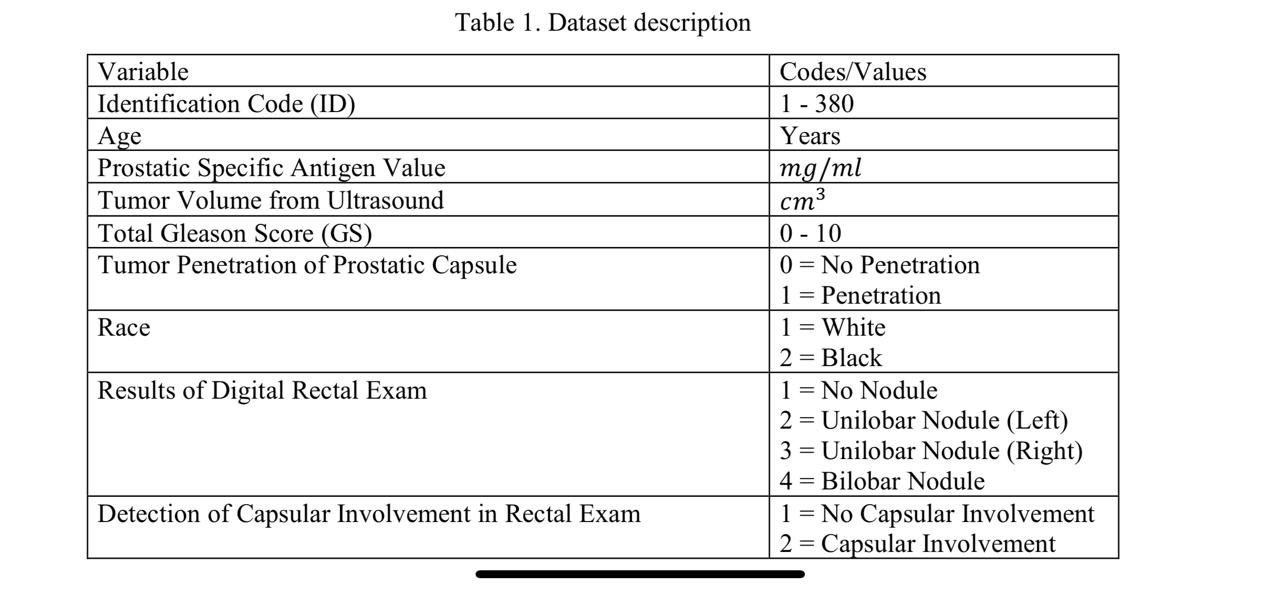




Next, we will drop the "Id" column as it won't help in modeling.

In [ ]:
df = df.drop(columns='ID')

We shall see brief description of our dataset

In [ ]:
df.describe()

,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.402632,66.039474,1.086842,2.271053,1.107895,15.408632,15.812921,6.384211
std,0.491074,6.527071,0.308773,1.000108,0.310656,19.997573,18.347620,1.091953
min,0.000000,43.000000,0.000000,1.000000,1.000000,0.300000,0.000000,0.000000
25%,0.000000,62.000000,1.000000,1.000000,1.000000,5.000000,0.000000,6.000000
50%,0.000000,67.000000,1.000000,2.000000,1.000000,8.750000,14.250000,6.000000
75%,1.000000,71.000000,1.000000,3.000000,1.000000,17.125000,26.450000,7.000000
max,1.000000,79.000000,2.000000,4.000000,2.000000,139.700000,97.600000,9.000000


Let's see if our training data is balanced

In [ ]:
np.bincount(df['GLEASON'])

array([  2,   0,   0,   0,   1,  67, 139, 128,  30,  13])

the dataset is so imbalanced and some numbers is zeros so we removed zeros 

In [ ]:
df.loc[df['GLEASON'] <= 6, 'GLEASON']=0
df.loc[df['GLEASON'] == 7, 'GLEASON']=1
df.loc[df['GLEASON'] == 8, 'GLEASON']=2
df.loc[df['GLEASON'] >= 9, 'GLEASON']=3

df.loc[df['RACE'] == 1, 'RACE']=0
df.loc[df['RACE'] == 2, 'RACE']=1

df.loc[df['DPROS'] == 1, 'DPROS']=0
df.loc[df['DPROS'] == 2, 'DPROS']=1
df.loc[df['DPROS'] == 3, 'DPROS']=2
df.loc[df['DPROS'] == 4, 'DPROS']=3

df.loc[df['DCAPS'] == 1, 'DCAPS']=0
df.loc[df['DCAPS'] == 2, 'DCAPS']=1

Next we check if our dataset has some missing values

In [ ]:
if(df.isnull().sum().sum() == 0):
  print('There is no missing values')
else:
  print(df.isnull().sum())

There is no missing values


As we see, our dataset has no missing values

Now we can construct the correlation matrix, to see the relationships between the attributes and how they affect each other. One thing to look for is highly correlated features. We shall remove highly correlated features for memory and storage concerns. In addition to that we want to remove any redundant features to avoid the curse of dimensionality and make the feature space more simpler for our model. A rule of thumb is to remove any feature that is correlated with +/- 0.75 or higher with any other feature.

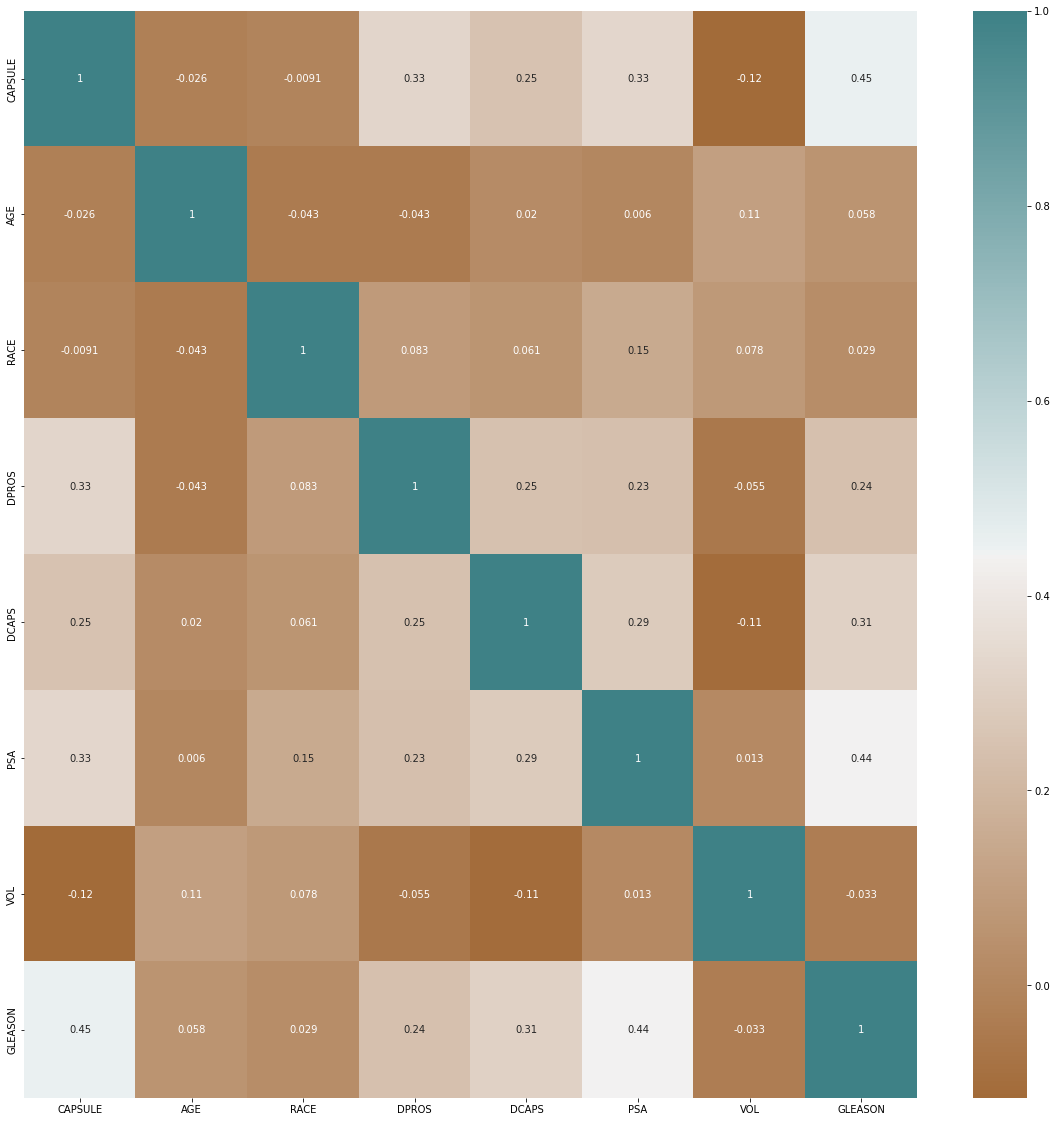

In [ ]:
corr = df.iloc[:, :].corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(2200,200,as_cmap=True), ax=ax)

It's time to build the scatter matrix! What we are looking for is some kind of correlation, some kind of class seperation based on some those features, we also look for interesting patterns that rise in the dataset and see why they rise.

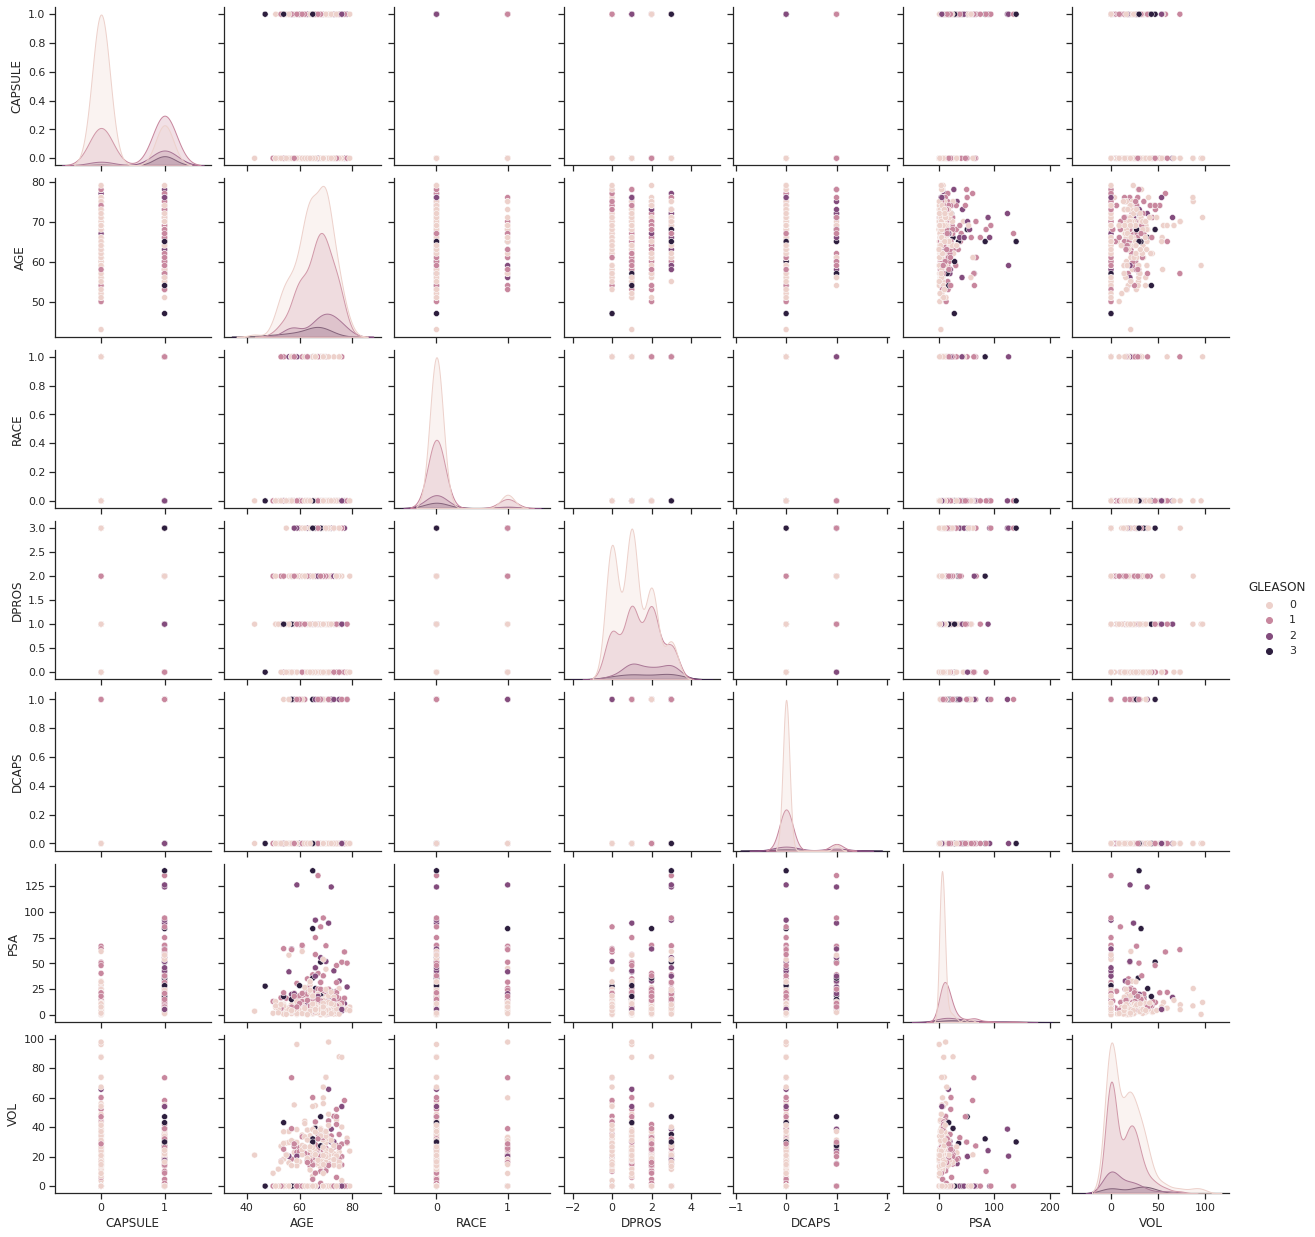

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(df.iloc[:, [0,1,2,3,4,5,6,7]], hue='GLEASON', )

plt.xticks(rotation=90)
    
plt.yticks(rotation=90)

plt.show()

density plot

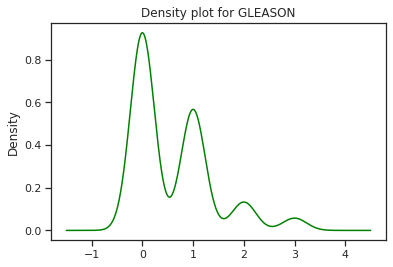

In [ ]:
# plotting the density plot 
# for 'speeding' attribute
# using plot.density()
df.GLEASON.plot.density(color='green')
plt.title('Density plot for GLEASON')
plt.show()

Boxplot between Age & Gleason 

Text(0.5, 0, 'GLEASON')

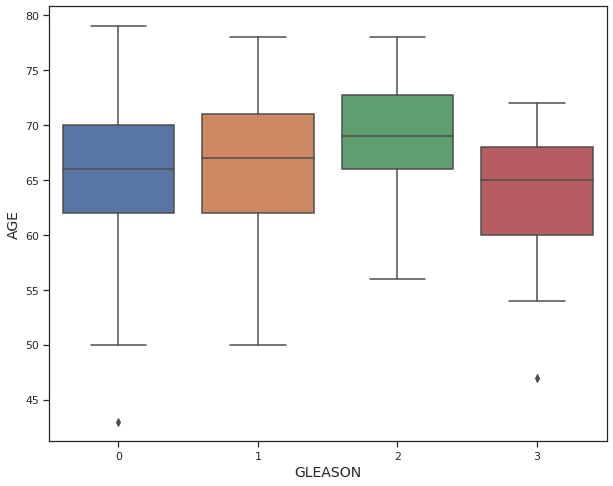

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='GLEASON',
            y='AGE',
            data=df)
plt.ylabel("AGE", size=14)
plt.xlabel("GLEASON", size=14)

barplot between RACE & GLEASON 

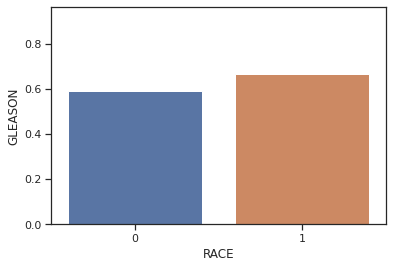

In [ ]:
ax = sns.barplot(x='RACE', y='GLEASON',
                  data=df,
                 errwidth=0)

boxplot between Gleason and CAPSULE

Text(0.5, 0, 'GLEASON')

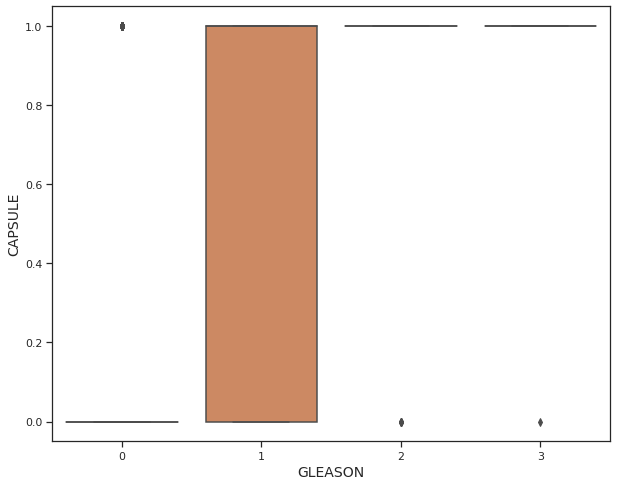

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='GLEASON',
            y='CAPSULE',
            data=df)
plt.ylabel("CAPSULE", size=14)
plt.xlabel("GLEASON", size=14)

scatter between Gleason and PSA 

Text(0, 0.5, 'PSA')

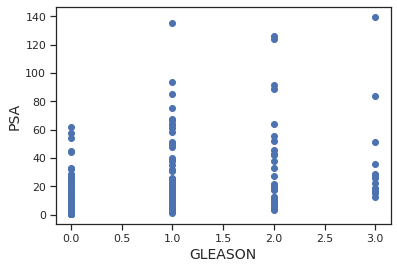

In [ ]:
x=df['GLEASON'].values
y=df['PSA'].values

plt.scatter(x, y)

plt.xlabel("GLEASON", size=14)
plt.ylabel("PSA", size=14)

barplot between Gleason and Volume 

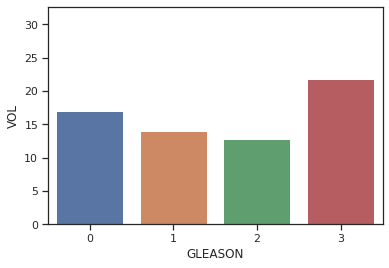

In [ ]:
ax = sns.barplot(x='GLEASON', y='VOL',
                  data=df,
                 errwidth=0)

#preprocessing

##Data Cleaning

there is no missing values and no features haighly correlated with each other 

##Feature Engineering


In [ ]:
df['multiple']=df['AGE']*df['VOL'] 

#Model Selection and Optimization

Now comes the model selection section. In this section will we evaluate the models that perform well in structured data. It's known that tree based methods are the state of the art when we are talking about structured data thus we will train and evaluate LightGBM, XGboost, Random Forests and ExtraTreeClassifier.. Linear models like logistic regression and support vector machines didn't perform well in this problem so I won't consider them in my final submission.

For the tree-based methods I will sklearn interface.the models were evaluated using cross validation score as it provides more accurate result with no bias.

In [ ]:
y=df['GLEASON']
X=df
X=X.drop(columns=['GLEASON'])

In [ ]:
X=X.values

In [ ]:
X

,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,multiple
0,0,65,0,1,0,1.4,0.0,0.0
1,0,72,0,2,1,6.7,0.0,0.0
2,0,70,0,0,1,4.9,0.0,0.0
3,0,76,1,1,0,51.2,20.0,1520.0
4,0,69,0,0,0,12.3,55.9,3857.1
...,...,...,...,...,...,...,...,...
375,0,58,1,2,0,18.2,28.6,1658.8
376,0,69,1,0,0,7.9,14.6,1007.4
377,1,76,0,1,0,5.5,53.9,4096.4
378,0,69,1,1,0,1.5,8.6,593.4


In [ ]:
X=X.drop(columns=['multiple'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, 
  test_size=0.20,
  stratify=y,
  random_state=1
)

In [ ]:
np.bincount(y_train)

array([167, 102,  24,  11])

using logisticRegression without any edit for imbanaced data

In [ ]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_probas = lr.predict_proba(X_test)

print('recall: ', recall_score(y_test, y_pred, average='macro'))
print('precision: ', precision_score(y_test, y_pred,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))
print('auc: ', roc_auc_score(y_test, y_probas, multi_class='ovr'))
print('accuracy score ' , accuracy_score(y_test,y_pred))

recall:  0.3163919413919414
precision:  0.2931818181818182
f1_score:  0.29941730165844915
auc:  0.7881434860846626
accuracy score  0.618421052631579


the f1-score is so bad 

so we use some ways to balance the data 

In [ ]:
ros = RandomOverSampler(random_state=1)
rus = RandomUnderSampler(random_state=1)
smt = SMOTE(k_neighbors = 3)

In [ ]:
np.bincount(y_train)

array([167, 102,  24,  11])

In [ ]:
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)
np.bincount(y_train_us)

array([11, 11, 11, 11])

In [ ]:
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)
np.bincount(y_train_os)

array([167, 167, 167, 167])

In [ ]:
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)
np.bincount(y_train_res)

array([167, 167, 167, 167])

then we find the best accuracy

##hold-out method using Random forest

In [ ]:
forest = RandomForestClassifier(random_state=0)#max_depth=5,n_estimators=350, random_state=1)
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    forest
    )
pipe_lr.fit(X_train_os, y_train_os)
y_pred = pipe_lr.predict(X_test)
y_probas = pipe_lr.predict_proba(X_test)

print('recall: ', recall_score(y_test, y_pred, average='macro'))
print('precision: ', precision_score(y_test, y_pred,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))
print('auc: ', roc_auc_score(y_test, y_probas, multi_class='ovr'))
print('accuracy score ' , accuracy_score(y_test,y_pred))


recall:  0.6318681318681318
precision:  0.67
f1_score:  0.6434782608695653
auc:  0.7886336457659987
accuracy score  0.631578947368421


In [ ]:
X['multiple']=df['multiple']
X

,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,Muiltiple_1,ID,Muiltiple_2,multiple
0,0,65,0,1,0,1.4,0.0,0.0,1,0,0.0
1,0,72,0,2,1,6.7,0.0,0.0,2,2,0.0
2,0,70,0,0,1,4.9,0.0,0.0,3,0,0.0
3,0,76,1,1,0,51.2,20.0,0.0,4,0,1520.0
4,0,69,0,0,0,12.3,55.9,0.0,5,0,3857.1
...,...,...,...,...,...,...,...,...,...,...,...
375,0,58,1,2,0,18.2,28.6,0.0,376,0,1658.8
376,0,69,1,0,0,7.9,14.6,0.0,377,0,1007.4
377,1,76,0,1,0,5.5,53.9,53.9,378,0,4096.4
378,0,69,1,1,0,1.5,8.6,0.0,379,0,593.4


In [ ]:
std=StandardScaler()
X_std=std.fit_transform(X)

In [ ]:
X=X.values

##cross_validation using Random-forest 

In [ ]:
def score_model_f(cv=None):
  """
  Creates folds manually, and upsamples within each fold.
  Returns an array of validation (recall) scores
  """
  if cv is None:
      cv =StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

  ros = RandomOverSampler()

  scores = []

  for train_fold_index, val_fold_index in cv.split(X_std, y):
    # Get the training data
    X_train_fold, y_train_fold = X_std[train_fold_index], y.iloc[train_fold_index]
    # Get the validation data
    X_val_fold, y_val_fold = X_std[val_fold_index], y.iloc[val_fold_index]

    # Upsample only the data in the training section
    X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold,
                                                                        y_train_fold)
    forest = RandomForestClassifier(max_depth=4,n_estimators=500, random_state=1)
    
    forest.fit(X_train_fold_upsample, y_train_fold_upsample)

    scoring=classification_report_with_accuracy_score(y_val_fold, forest.predict(X_val_fold))
    scores.append(scoring)

  return scores

for i in [10]:
  originalclass = []
  predictedclass = []
  def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 
 
  cv = StratifiedKFold(n_splits=i, shuffle=True, random_state=1)
 
  nested_score = score_model_f(cv=cv)
 
  print("\n", i, " fold")
  print(classification_report(originalclass, predictedclass))

  confmat = confusion_matrix(originalclass, predictedclass)
  print( confmat )
  print("Accuracy :", np.mean(nested_score))  


 10  fold
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       209
           1       0.54      0.43      0.48       128
           2       0.19      0.37      0.25        30
           3       0.38      0.62      0.47        13

    accuracy                           0.61       380
   macro avg       0.48      0.54      0.49       380
weighted avg       0.64      0.61      0.62       380

[[158  37  13   1]
 [ 36  55  30   7]
 [  5   9  11   5]
 [  1   1   3   8]]
Accuracy : 0.6105263157894738


##hold-out method using XGBClassifier

In [ ]:
model = XGBClassifier()
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=3),
    model
    )
pipe_lr.fit(X_train_os, y_train_os)
y_pred = pipe_lr.predict(X_test)
y_probas = pipe_lr.predict_proba(X_test)

print('recall: ', recall_score(y_test, y_pred, average='macro'))
print('precision: ', precision_score(y_test, y_pred,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))
print('auc: ', roc_auc_score(y_test, y_probas, multi_class='ovr'))
print('accuracy score ' , accuracy_score(y_test,y_pred))


recall:  0.5370879120879121
precision:  0.6058277962347729
f1_score:  0.5573529411764706
auc:  0.7104411910294264
accuracy score  0.6447368421052632


##Hold-out using GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(random_state=1) #,learning_rate= 0.01, max_depth= 4, n_estimators= 500, subsample= 0.7)
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=3),
    model
    )
pipe_lr.fit(X_train_os, y_train_os)
y_pred = pipe_lr.predict(X_test)
y_probas = pipe_lr.predict_proba(X_test)

print('recall: ', recall_score(y_test, y_pred, average='macro'))
print('precision: ', precision_score(y_test, y_pred,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))
print('auc: ', roc_auc_score(y_test, y_probas, multi_class='ovr'))
print('accuracy score ' , accuracy_score(y_test,y_pred))

recall:  0.5705128205128205
precision:  0.7628368794326241
f1_score:  0.631269736358963
auc:  0.7689500602735897
accuracy score  0.7105263157894737


In [ ]:
X['multiple']=df['multiple']


In [ ]:
X

,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,multiple
0,0,65,0,1,0,1.4,0.0,0.0
1,0,72,0,2,1,6.7,0.0,0.0
2,0,70,0,0,1,4.9,0.0,0.0
3,0,76,1,1,0,51.2,20.0,1520.0
4,0,69,0,0,0,12.3,55.9,3857.1
...,...,...,...,...,...,...,...,...
375,0,58,1,2,0,18.2,28.6,1658.8
376,0,69,1,0,0,7.9,14.6,1007.4
377,1,76,0,1,0,5.5,53.9,4096.4
378,0,69,1,1,0,1.5,8.6,593.4


In [ ]:
X_std=std.fit_transform(X)

##hold-out method using extra tree

In [ ]:

extraTrees = ExtraTreesClassifier()#n_estimators=1000, max_depth=35, criterion='entropy')

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    extraTrees
    )
pipe_lr.fit(X_train_os, y_train_os)
y_pred = pipe_lr.predict(X_test)
y_probas = pipe_lr.predict_proba(X_test)

print('recall: ', recall_score(y_test, y_pred, average='macro'))
print('precision: ', precision_score(y_test, y_pred,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))
print('auc: ', roc_auc_score(y_test, y_probas, multi_class='ovr'))
print('accuracy score ' , accuracy_score(y_test,y_pred))

recall:  0.35210622710622713
precision:  0.413858939802336
f1_score:  0.35835666293393054
auc:  0.765553665333077
accuracy score  0.618421052631579


##cross_validation using extra Trees

In [ ]:
def score_model_XG(cv=None):
  """
  Creates folds manually, and upsamples within each fold.
  Returns an array of validation (recall) scores
  """
  if cv is None:
      cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  ros = RandomOverSampler()

  scores = []

  for train_fold_index, val_fold_index in cv.split(X, y):
    # Get the training data
    X_train_fold, y_train_fold = X.iloc[train_fold_index], y.iloc[train_fold_index]
    # Get the validation data
    X_val_fold, y_val_fold = X.iloc[val_fold_index], y.iloc[val_fold_index]

    # Upsample only the data in the training section
    X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold,
                                                                        y_train_fold)
    model = ExtraTreesClassifier()
    model.fit(X_train_fold_upsample, y_train_fold_upsample)

    scoring=classification_report_with_accuracy_score(y_val_fold, model.predict(X_val_fold))
    scores.append(scoring)

  return scores


for i in [10]:
  originalclass = []
  predictedclass = []
  def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

  cv = StratifiedKFold(n_splits=i, shuffle=True, random_state=1)

  nested_score = score_model_XG(cv=cv)

  print("\n", i, " fold")
  print(classification_report(originalclass, predictedclass))

  confmat = confusion_matrix(originalclass, predictedclass)
  print( confmat )
  print("Accuracy :", np.mean(nested_score)) 


 10  fold
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       209
           1       0.51      0.48      0.49       128
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        13

    accuracy                           0.62       380
   macro avg       0.31      0.33      0.32       380
weighted avg       0.57      0.62      0.59       380

[[174  32   2   1]
 [ 56  61   8   3]
 [  8  19   0   3]
 [  3   7   3   0]]
Accuracy : 0.618421052631579


##hold-out method using HistGradiant

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    model
    )
pipe_lr.fit(X_train_os, y_train_os)
y_pred = pipe_lr.predict(X_test)
y_probas = pipe_lr.predict_proba(X_test)

print('recall: ', recall_score(y_test, y_pred, average='macro'))
print('precision: ', precision_score(y_test, y_pred,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))
print('auc: ', roc_auc_score(y_test, y_probas, multi_class='ovr'))
print('accuracy score ' , accuracy_score(y_test,y_pred))

recall:  0.4784798534798535
precision:  0.4726333641689793
f1_score:  0.4633977935743585
auc:  0.7517113477407595
accuracy score  0.618421052631579


##cross-validation method using HistGradiant

In [ ]:
def score_model_XG(cv=None):
  """
  Creates folds manually, and upsamples within each fold.
  Returns an array of validation (recall) scores
  """
  if cv is None:
      cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  ros = RandomOverSampler()

  scores = []

  for train_fold_index, val_fold_index in cv.split(X, y):
    # Get the training data
    X_train_fold, y_train_fold = X.iloc[train_fold_index], y.iloc[train_fold_index]
    # Get the validation data
    X_val_fold, y_val_fold = X.iloc[val_fold_index], y.iloc[val_fold_index]

    # Upsample only the data in the training section
    X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold,
                                                                        y_train_fold)
    model = HistGradientBoostingClassifier()
    model.fit(X_train_fold_upsample, y_train_fold_upsample)

    scoring=classification_report_with_accuracy_score(y_val_fold, model.predict(X_val_fold))
    scores.append(scoring)

  return scores


for i in [10]:
  originalclass = []
  predictedclass = []
  def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

  cv = StratifiedKFold(n_splits=i, shuffle=True, random_state=1)

  nested_score = score_model_XG(cv=cv)

  print("\n", i, " fold")
  print(classification_report(originalclass, predictedclass))

  confmat = confusion_matrix(originalclass, predictedclass)
  print( confmat )
  print("Accuracy :", np.mean(nested_score)) 


 10  fold
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       209
           1       0.47      0.46      0.46       128
           2       0.08      0.07      0.07        30
           3       0.22      0.15      0.18        13

    accuracy                           0.59       380
   macro avg       0.38      0.37      0.37       380
weighted avg       0.58      0.59      0.59       380

[[163  39   6   1]
 [ 47  59  17   5]
 [  9  18   2   1]
 [  0  10   1   2]]
Accuracy : 0.5947368421052632


##hold-out method using lightGbm

In [ ]:

model = LGBMClassifier()

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    model
    )
pipe_lr.fit(X_train_os, y_train_os)
y_pred = pipe_lr.predict(X_test)
y_probas = pipe_lr.predict_proba(X_test)

print('recall: ', recall_score(y_test, y_pred, average='macro'))
print('precision: ', precision_score(y_test, y_pred,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))
print('auc: ', roc_auc_score(y_test, y_probas, multi_class='ovr'))
print('accuracy score ' , accuracy_score(y_test,y_pred))

recall:  0.4532967032967033
precision:  0.4455750847980265
f1_score:  0.43737165278096257
auc:  0.7276363580775345
accuracy score  0.5789473684210527


##cross-validation method using lightGbm

In [ ]:
def score_model_XG(cv=None):
  """
  Creates folds manually, and upsamples within each fold.
  Returns an array of validation (recall) scores
  """
  if cv is None:
      cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  ros = RandomOverSampler()

  scores = []

  for train_fold_index, val_fold_index in cv.split(X, y):
    # Get the training data
    X_train_fold, y_train_fold = X.iloc[train_fold_index], y.iloc[train_fold_index]
    # Get the validation data
    X_val_fold, y_val_fold = X.iloc[val_fold_index], y.iloc[val_fold_index]

    # Upsample only the data in the training section
    X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold,
                                                                        y_train_fold)
    model = LGBMClassifier()
    model.fit(X_train_fold_upsample, y_train_fold_upsample)

    scoring=classification_report_with_accuracy_score(y_val_fold, model.predict(X_val_fold))
    scores.append(scoring)

  return scores


for i in [10]:
  originalclass = []
  predictedclass = []
  def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

  cv = StratifiedKFold(n_splits=i, shuffle=True, random_state=1)

  nested_score = score_model_XG(cv=cv)

  print("\n", i, " fold")
  print(classification_report(originalclass, predictedclass))

  confmat = confusion_matrix(originalclass, predictedclass)
  print( confmat )
  print("Accuracy :", np.mean(nested_score)) 


 10  fold
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       209
           1       0.49      0.50      0.50       128
           2       0.04      0.03      0.04        30
           3       0.17      0.15      0.16        13

    accuracy                           0.59       380
   macro avg       0.36      0.36      0.36       380
weighted avg       0.59      0.59      0.59       380

[[159  40   8   2]
 [ 42  64  15   7]
 [ 12  16   1   1]
 [  0  10   1   2]]
Accuracy : 0.5947368421052632


##cross-validation method using GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

def score_model_f(cv=None):
  """
  Creates folds manually, and upsamples within each fold.
  Returns an array of validation (recall) scores
  """
  if cv is None:
      cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  ros = RandomOverSampler()

  scores = []

  for train_fold_index, val_fold_index in cv.split(X, y):
    # Get the training data
    X_train_fold, y_train_fold = X.iloc[train_fold_index], y.iloc[train_fold_index]
    # Get the validation data
    X_val_fold, y_val_fold = X.iloc[val_fold_index], y.iloc[val_fold_index]

    # Upsample only the data in the training section
    X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold,
                                                                        y_train_fold)
    forest = GaussianNB()
    
    forest.fit(X_train_fold_upsample, y_train_fold_upsample)

    scoring=classification_report_with_accuracy_score(y_val_fold, forest.predict(X_val_fold))
    scores.append(scoring)

  return scores

for i in [10]:
  originalclass = []
  predictedclass = []
  def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 
 
  cv = StratifiedKFold(n_splits=i, shuffle=True, random_state=1)
 
  nested_score = score_model_f(cv=cv)
 
  print("\n", i, " fold")
  print(classification_report(originalclass, predictedclass))

  confmat = confusion_matrix(originalclass, predictedclass)
  print( confmat )
  print("Accuracy :", np.mean(nested_score))  


 10  fold
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       209
           1       0.47      0.17      0.25       128
           2       0.16      0.23      0.19        30
           3       0.08      0.31      0.12        13

    accuracy                           0.53       380
   macro avg       0.35      0.38      0.33       380
weighted avg       0.56      0.53      0.52       380

[[167  19  12  11]
 [ 57  22  22  27]
 [  9   4   7  10]
 [  3   2   4   4]]
Accuracy : 0.5263157894736842


#Evaluation

##cross_validation using XGBClassifier

In [ ]:
def score_model_XG(cv=None):
  """
  Creates folds manually, and upsamples within each fold.
  Returns an array of validation (recall) scores
  """
  if cv is None:
      cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  ros = RandomOverSampler()

  scores = []

  for train_fold_index, val_fold_index in cv.split(X_std, y):
    # Get the training data
    X_train_fold, y_train_fold = X_std[train_fold_index], y.iloc[train_fold_index]
    # Get the validation data
    X_val_fold, y_val_fold = X_std[val_fold_index], y.iloc[val_fold_index]

    # Upsample only the data in the training section
    X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold,
                                                                        y_train_fold)
    model = XGBClassifier()
    model.fit(X_train_fold_upsample, y_train_fold_upsample)

    scoring=classification_report_with_accuracy_score(y_val_fold, model.predict(X_val_fold))
    scores.append(scoring)

  return scores


for i in [10]:
  originalclass = []
  predictedclass = []
  def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

  cv = StratifiedKFold(n_splits=i, shuffle=True, random_state=1)

  nested_score = score_model_XG(cv=cv)

  print("\n", i, " fold")
  print(classification_report(originalclass, predictedclass))

  confmat = confusion_matrix(originalclass, predictedclass)
  print( confmat )
  print("Accuracy :", np.mean(nested_score)) 


 10  fold
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       209
           1       0.55      0.52      0.53       128
           2       0.23      0.30      0.26        30
           3       0.37      0.54      0.44        13

    accuracy                           0.64       380
   macro avg       0.48      0.53      0.50       380
weighted avg       0.65      0.64      0.64       380

[[160  35  11   3]
 [ 35  66  19   8]
 [  6  14   9   1]
 [  0   5   1   7]]
Accuracy : 0.6368421052631579


##cross_validation using GradientBoostingClassifier

In [ ]:
def score_model_gred(cv=None):
  """
  Creates folds manually, and upsamples within each fold.
  Returns an array of validation (recall) scores
  """
  if cv is None:
      cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  ros = RandomOverSampler()

  scores = []

  for train_fold_index, val_fold_index in cv.split(X_std, y):
    # Get the training data
    X_train_fold, y_train_fold = X_std[train_fold_index], y.iloc[train_fold_index]
    # Get the validation data
    X_val_fold, y_val_fold = X_std[val_fold_index], y.iloc[val_fold_index]

    # Upsample only the data in the training section
    X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold,
                                                                        y_train_fold)
    model = GradientBoostingClassifier(random_state=1,learning_rate= 0.01, max_depth= 5, n_estimators= 500, subsample= 0.7)
    model.fit(X_train_fold_upsample, y_train_fold_upsample)

    scoring=classification_report_with_accuracy_score(y_val_fold, model.predict(X_val_fold))
    scores.append(scoring)

  return scores


for i in [10]:
  originalclass = []
  predictedclass = []
  def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 
 
  cv = StratifiedKFold(n_splits=i, shuffle=True, random_state=1)
 
  nested_score = score_model_gred(cv=cv)
 
  print("\n", i, " fold")
  print(classification_report(originalclass, predictedclass))

  confmat = confusion_matrix(originalclass, predictedclass)
  print( confmat )
  print("Accuracy :", np.mean(nested_score))  


 10  fold
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       209
           1       0.49      0.54      0.51       128
           2       0.12      0.10      0.11        30
           3       0.70      0.54      0.61        13

    accuracy                           0.62       380
   macro avg       0.52      0.48      0.50       380
weighted avg       0.61      0.62      0.61       380

[[155  46   7   1]
 [ 43  69  14   2]
 [  8  19   3   0]
 [  0   6   0   7]]
Accuracy : 0.6157894736842104
